In [8]:
from keras.models import load_model
import cv2
import numpy as np

In [9]:
model = load_model('C:\\Users\\kongkon\\Desktop\\model-017.model')

face_clsfr=cv2.CascadeClassifier('C:\\Users\\kongkon\\Desktop\\haarcascade_frontalface_default.xml')

source=cv2.VideoCapture(0)

labels_dict={0:'with MASK',1:'No MASK'}
color_dict={0:(0,255,0),1:(0,0,255)}

In [10]:
while(True):

    ret,img=source.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_clsfr.detectMultiScale(gray,1.3,5)  

    for (x,y,w,h) in faces:
    
        face_img=gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(100,100))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,100,100,1))
        result=model.predict(reshaped)

        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
        
    cv2.imshow('Corona LIVE',img)
    key=cv2.waitKey(1)
    
    if(key==27):
        break
        
cv2.destroyAllWindows()
source.release()

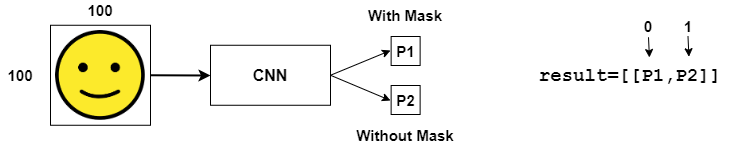

## Motivated by the works of,

1. [Adrian Rosebrock](https://www.pyimagesearch.com/2020/05/04/covid-19-face-mask-detector-with-opencv-keras-tensorflow-and-deep-learning/)
2. [sentdex](https://pythonprogramming.net/convolutional-neural-network-deep-learning-python-tensorflow-keras/)
3. [Prajna Bhandary](https://github.com/prajnasb/observations/tree/master/experiements/data)